In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import re
from numpy import genfromtxt
import tensorflow as tf
import keras
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Embedding, GlobalAveragePooling1D
from tensorflow.keras.constraints import max_norm
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Activation, SpatialDropout1D, GlobalMaxPooling1D, TimeDistributed
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam

In [6]:
data1 = pd.read_csv("eeg/ML101_KS.csv").T
data2= pd.read_csv("eeg/ML101_US.csv").T
data3= pd.read_csv("eeg/ML102_KS.csv").T
data4= pd.read_csv("eeg/ML102_US.csv").T
data5= pd.read_csv("eeg/ML103_KS.csv").T
data6= pd.read_csv("eeg/ML103_US.csv").T
data7= pd.read_csv("eeg/ML104_KS.csv").T
data8= pd.read_csv("eeg/ML104_US.csv").T
data9= pd.read_csv("eeg/ML105_KS.csv").T
data10= pd.read_csv("eeg/ML105_US.csv").T
data11= pd.read_csv("eeg/ML106_KS.csv").T
data12= pd.read_csv("eeg/ML106_US.csv").T
data13= pd.read_csv("eeg/ML107_KS.csv").T
data14= pd.read_csv("eeg/ML107_US.csv").T
data15= pd.read_csv("eeg/ML108_KS.csv").T
data16= pd.read_csv("eeg/ML108_US.csv").T

labels = [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]

In [7]:
data1 = data1.to_numpy()
data2 = data2.to_numpy()
data3 = data3.to_numpy()
data4 = data4.to_numpy()
data5 = data5.to_numpy()
data6 = data6.to_numpy()
data7 = data7.to_numpy()
data8 = data8.to_numpy()
data9 = data9.to_numpy()
data10 = data10.to_numpy()
data11 = data11.to_numpy()
data12 = data12.to_numpy()
data13 = data13.to_numpy()
data14 = data14.to_numpy()
data15 = data15.to_numpy()
data16 = data16.to_numpy()

In [8]:
data1 = np.expand_dims(data1, axis=0)
data2 = np.expand_dims(data2, axis=0)
data3 = np.expand_dims(data3, axis=0)
data4 = np.expand_dims(data4, axis=0)
data5 = np.expand_dims(data5, axis=0)
data6 = np.expand_dims(data6, axis=0)
data7 = np.expand_dims(data7, axis=0)
data8 = np.expand_dims(data8, axis=0)
data9 = np.expand_dims(data9, axis=0)
data10 = np.expand_dims(data10, axis=0)
data11 = np.expand_dims(data11, axis=0)
data12 = np.expand_dims(data12, axis=0)
data13 = np.expand_dims(data13, axis=0)
data14 = np.expand_dims(data14, axis=0)
data15 = np.expand_dims(data15, axis=0)
data16 = np.expand_dims(data16, axis=0)

In [9]:
data1 = data1[:,:13000,:]
data2 = data2[:,:13000,:]
data3 = data3[:,:13000,:]
data4 = data4[:,:13000,:]
data5 = data5[:,:13000,:]
data6 = data6[:,:13000,:]
data7 = data7[:,:13000,:]
data8 = data8[:,:13000,:]
data9 = data9[:,:13000,:]
data10 = data10[:,:13000,:]
data11 = data11[:,:13000,:]
data12 = data12[:,:13000,:]
data13 = data13[:,:13000,:]
data14 = data14[:,:13000,:]
data15 = data15[:,:13000,:]
data16 = data16[:,:13000,:]

In [11]:
data1.shape

(1, 13000, 13)

In [12]:
data_all = np.concatenate((data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12,
                         data13, data14, data15, data16), axis = 0)

In [13]:
labels = np.array(labels)

In [15]:
model = Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(800, activation = "relu"))
model.add(tf.keras.layers.Dense(500, activation = "relu"))
model.add(tf.keras.layers.Dense(500, activation = "relu"))
model.add(tf.keras.layers.Dense(500, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "relu"))
model.add(tf.keras.layers.Dense(2, activation = "softmax"))

optimizer = keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model_history = model.fit(data_all, labels, batch_size = 16, validation_split = 0.2, epochs = 50)


Epoch 1/50
1/1 [==============================] - 0s 362ms/step - loss: 17.2280 - accuracy: 0.5833 - val_loss: 21.6283 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 56ms/step - loss: 26.2244 - accuracy: 0.6667 - val_loss: 767.1265 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 54ms/step - loss: 662.0851 - accuracy: 0.5833 - val_loss: 232.3251 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 53ms/step - loss: 194.3470 - accuracy: 0.5833 - val_loss: 87.2165 - val_accuracy: 0.7500
Epoch 5/50
1/1 [==============================] - 0s 54ms/step - loss: 154.9748 - accuracy: 0.5833 - val_loss: 22.8617 - val_accuracy: 0.7500
Epoch 6/50
1/1 [==============================] - 0s 57ms/step - loss: 39.5738 - accuracy: 0.5833 - val_loss: 66.4252 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 64ms/step - loss: 52.9211 - accuracy: 0.5833 - val_loss: 138.7711 - val_accuracy: 0.7500
Epoch 

In [16]:
import pydot, graphviz

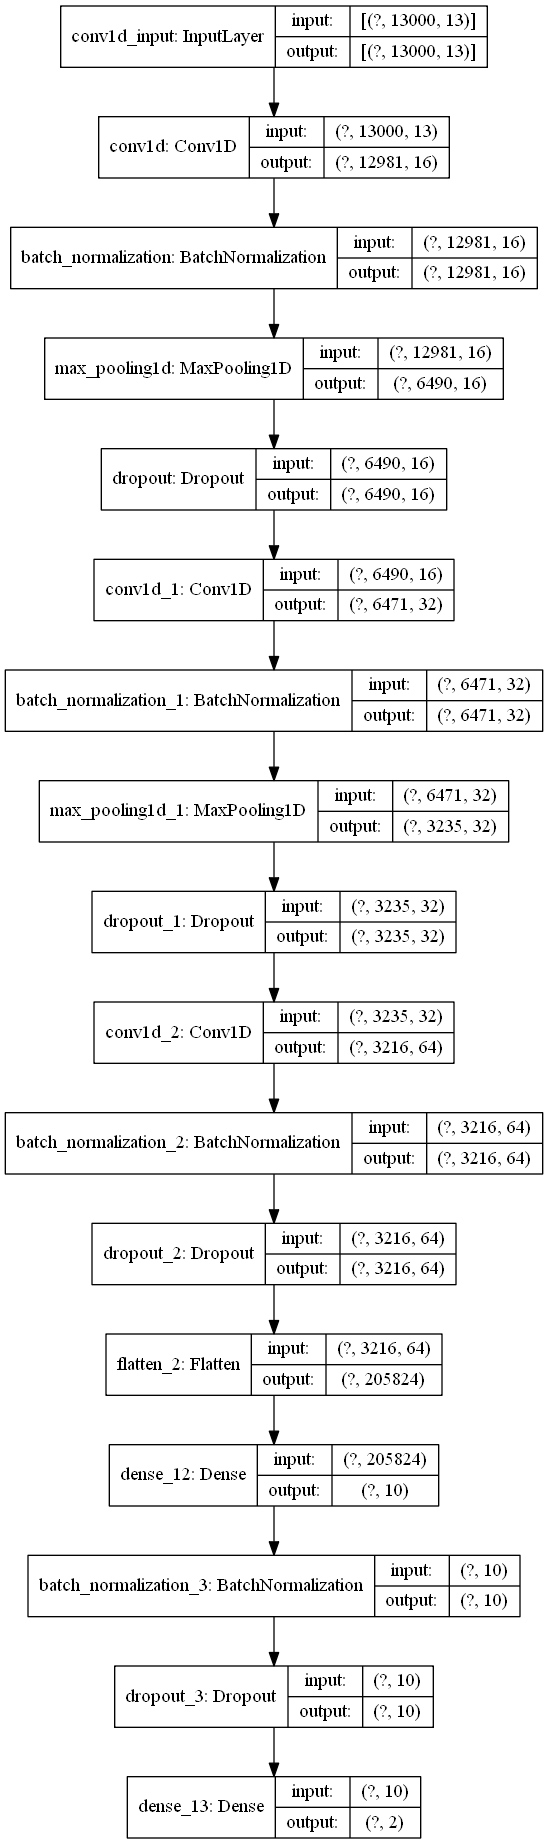

In [22]:
keras.utils.plot_model(model_cnn, show_shapes = True)

In [133]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 169000)            0         
_________________________________________________________________
dense_88 (Dense)             (None, 1000)              169001000 
_________________________________________________________________
dense_89 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_90 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_91 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_92 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_93 (Dense)             (None, 2)               

In [18]:
data_all.shape

(16, 13000, 13)

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_all, labels, test_size = 0.2)

In [20]:
model_cnn = Sequential()

model_cnn.add(tf.keras.layers.Conv1D(filters = 16, input_shape = (13000, 13), kernel_size = 20, activation = "relu"))
model_cnn.add(tf.keras.layers.BatchNormalization())
model_cnn.add(tf.keras.layers.MaxPooling1D(pool_size = 2))
model_cnn.add(tf.keras.layers.Dropout(0.2))

model_cnn.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 20, activation = "relu"))
model_cnn.add(tf.keras.layers.BatchNormalization())
model_cnn.add(tf.keras.layers.MaxPooling1D(pool_size = 2))
model_cnn.add(tf.keras.layers.Dropout(0.2))

model_cnn.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 20, activation = "relu"))
model_cnn.add(tf.keras.layers.BatchNormalization())
model_cnn.add(tf.keras.layers.Dropout(0.2))

model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(10, activation = "relu"))
model_cnn.add(tf.keras.layers.BatchNormalization())
model_cnn.add(tf.keras.layers.Dropout(0.2))
model_cnn.add(tf.keras.layers.Dense(2, activation = "softmax"))


callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 20, restore_best_weights = True)
optimizer = keras.optimizers.Adam(learning_rate = 1e-4)
model_cnn.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model_cnn_history = model_cnn.fit(x_train, y_train, batch_size = 4, validation_data = (x_test, y_test), epochs = 100, callbacks = [callback])

Epoch 1/100
3/3 [==============================] - 1s 284ms/step - loss: 0.8389 - accuracy: 0.5833 - val_loss: 4.5990 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 154ms/step - loss: 0.6959 - accuracy: 0.6667 - val_loss: 5.7176 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 155ms/step - loss: 0.6474 - accuracy: 0.5833 - val_loss: 4.5695 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 149ms/step - loss: 0.4321 - accuracy: 0.7500 - val_loss: 3.6244 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 142ms/step - loss: 1.0024 - accuracy: 0.5833 - val_loss: 3.2692 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 143ms/step - loss: 0.3502 - accuracy: 0.7500 - val_loss: 2.3781 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 150ms/step - loss: 0.4596 - accuracy: 0.7500 - val_loss: 1.4238 - val_accuracy: 0.5000
Epoch 8/100
3

In [21]:
test = model.evaluate(x_test, y_test)
test_cnn = model_cnn.evaluate(x_test, y_test)

1/1 [==============================] - 0s 952us/step - loss: 0.5094 - accuracy: 0.7500


In [134]:
model_cnn.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_83 (Conv1D)           (None, 12981, 16)         4176      
_________________________________________________________________
batch_normalization_50 (Batc (None, 12981, 16)         64        
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 6490, 16)          0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 6490, 16)          0         
_________________________________________________________________
conv1d_84 (Conv1D)           (None, 6471, 32)          10272     
_________________________________________________________________
batch_normalization_51 (Batc (None, 6471, 32)          128       
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 3235, 32)        